### Plot the evolution of kinetic energy and potentail vorticity in the 2-layer QG spin up simulation 

In [2]:
import numpy as np
import dask
import xarray as xr
import matplotlib.pyplot as plt

In [3]:
import pyqg
pyqg.__version__

'0.4.0'

In [4]:
# dask.config.set(**{'array.slicing.split_large_chunks': True})

In [5]:
# import spin-up files
ds = xr.open_mfdataset('/burg/abernathey/users/hillary/pyqg_spin_up/*.nc')
ds

<xarray.Dataset>
Dimensions:     (time: 514, l: 512, k: 257, lev: 2, lev_mid: 1, y: 512, x: 512)
Coordinates:
  * k           (k) float64 0.0 5.236e-06 1.047e-05 ... 0.00133 0.001335 0.00134
  * l           (l) float64 0.0 5.236e-06 1.047e-05 ... -1.047e-05 -5.236e-06
  * lev         (lev) int64 1 2
  * lev_mid     (lev_mid) float64 1.5
  * time        (time) timedelta64[ns] 7 days 14 days ... 3591 days 3598 days
  * x           (x) float64 1.172e+03 3.516e+03 ... 1.196e+06 1.199e+06
  * y           (y) float64 1.172e+03 3.516e+03 ... 1.196e+06 1.199e+06
Data variables: (12/16)
    APEflux     (time, l, k) float64 dask.array<chunksize=(1, 512, 257), meta=np.ndarray>
    APEgen      (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    APEgenspec  (time, l, k) float64 dask.array<chunksize=(1, 512, 257), meta=np.ndarray>
    EKE         (time, lev) float64 dask.array<chunksize=(1, 2), meta=np.ndarray>
    EKEdiss     (time) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    Ensspec     (time, lev, l, k) float64 dask.array<chunksize=(1, 2, 512, 257), meta=np.ndarray>
    ...          ...
    entspec     (time, l, k) float64 dask.array<chunksize=(1, 512, 257), meta=np.ndarray>
    q           (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 512, 512), meta=np.ndarray>
    u           (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 512, 512), meta=np.ndarray>
    ufull       (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 512, 512), meta=np.ndarray>
    v           (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 512, 512), meta=np.ndarray>
    vfull       (time, lev, y, x) float64 dask.array<chunksize=(1, 2, 512, 512), meta=np.ndarray>
Attributes: (12/23)
    pyqg:beta:       1.3e-11
    pyqg:delta:      0.25
    pyqg:del2:       0.8
    pyqg:dt:         600.0
    pyqg:filterfac:  23.6
    pyqg:L:          1200000
    ...              ...
    pyqg:tc:         1008
    pyqg:tmax:       311040000
    pyqg:twrite:     50000
    pyqg:W:          1200000
    title:           pyqg: Python Quasigeostrophic Model
    reference:       https://pyqg.readthedocs.io/en/latest/index.html

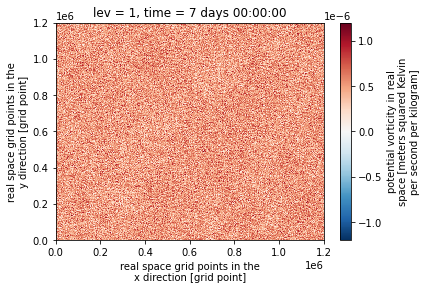

In [6]:
ds.q[0,0,:,:].plot()

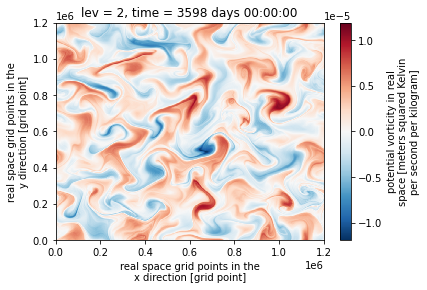

In [7]:
ds.q[-1,1,:,:].plot()

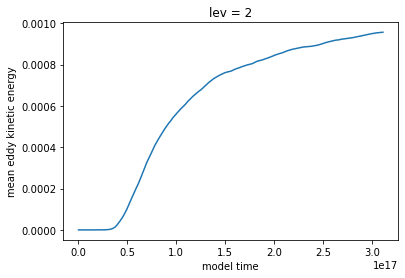

In [8]:
ds.EKE[:,1].plot()

Text(0.5, 0, 'model time (year)')

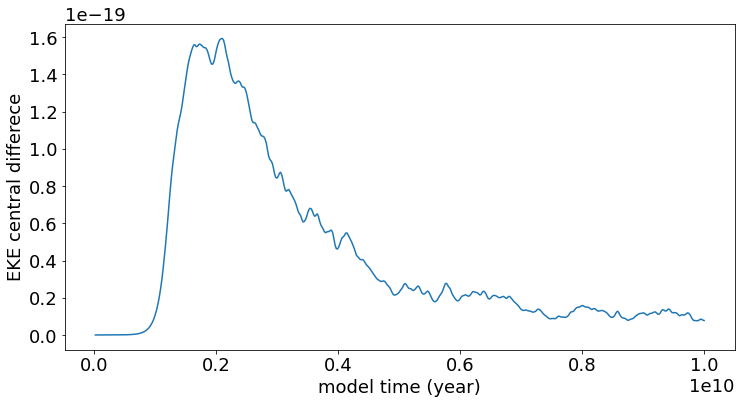

In [9]:
# Mean Eddy Kinetic Energy (EKE) as a function of time
dEKE_dt = np.gradient(ds.EKE.isel(lev=0), ds.time)
# I = int(np.where(np.abs(ds.time - year*14)==np.min(np.abs(ds.time - year*14)))[0])
# time_stable = ds.time[I].values

# Plot EKE derivative
year = 31104000
plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(12,6)); plt.plot(ds.time/year, dEKE_dt)
plt.ylabel('EKE central differece'); plt.xlabel('model time (year)')
# plt.axvline(x=time_stable/year, color='k', linestyle='--')


# print('model appears stable at', ds.time[I].values/year, 'years');

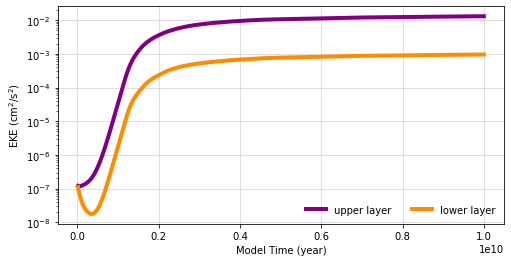

In [30]:
# Plot time series of EKE
plt.figure(figsize=(8,4))
plt.semilogy(ds.time/year, ds.EKE.isel(lev=0), lw=4, color='purple', label='upper layer')
plt.semilogy(ds.time/year, ds.EKE.isel(lev=1), lw=4, color='darkorange', label='lower layer')
plt.grid(True, alpha=0.5); plt.legend(frameon=False, ncol=2)
plt.ylabel(r'EKE ($\rmcm^{2}$/$\rms^{2}$)'); plt.xlabel('Model Time (year)');
fig.tight_layout()
plt.savefig('/burg/home/hs3277/lcs-ml/images/spin_up_EKE.png', bbox_inches='tight')


As the model gets spun up, the mean EKE increases until it reaches an equilibrated state. When the EKE plateaus the model is in a stable state.

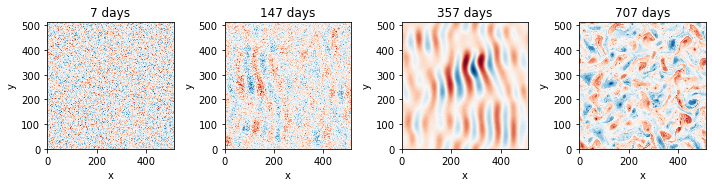

In [27]:
# Evolution of the upper PV anomaly field
# print('stable index ', int(np.where(ds.time == time_stable)[0]))

plt.rcParams.update({'font.size': 10})
plt.rcParams['image.cmap'] = 'RdBu'

ints = [0, 20, 50, 100]
fig = plt.figure(figsize=(10,8))
for i in enumerate(ints):
    ax = plt.subplot(1,4,i[0]+1)
    plt.pcolormesh(ds.q[i[1],0,:,:])
    plt.title(ds.time[i[1]].values.astype('timedelta64[D]'), color='k') # The titles correspond to the model time in years. 
    plt.xlabel('x')
    plt.ylabel('y')
    ax.set_aspect('equal')
    
fig.tight_layout()

plt.savefig('/burg/home/hs3277/lcs-ml/images/spin_up_PV.png', bbox_inches='tight')


In [ ]:
# Save model state at equilibrium
I = int(np.where(np.abs(ds.time - time_stable)==np.min(np.abs(ds.time - time_stable)))[0])
qg_equilibrium = ds[dict(time=I)]

path = '/burg/abernathey/users/hillary/'
qg_equilibrium.to_netcdf(path+'QG_equilibrium_proto.nc', engine='h5netcdf', invalid_netcdf=True)